# Tutorial: Feature Importance: Opening the Black Box

Salah satu kritik umum terhadap model *machine learning* yang kompleks adalah bahwa mereka bisa menjadi "kotak hitam" (*black box*). Kita tahu mereka membuat prediksi yang akurat, tetapi kita tidak tahu *mengapa* atau *bagaimana* mereka sampai pada kesimpulan tersebut.

Untungnya, model *ensemble* berbasis pohon seperti Random Forest dan Gradient Boosting memiliki fitur luar biasa yang memungkinkan kita untuk "mengintip" ke dalam logika mereka: **Feature Importance**.

Di notebook ini, kita akan belajar cara mengekstrak dan memvisualisasikan pentingnya fitur untuk memahami variabel mana yang paling berpengaruh dalam model kita.


---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Menjelaskan bagaimana model *ensemble* berbasis pohon menghitung pentingnya fitur.
* Mengakses atribut `.feature_importances_` dari model yang telah dilatih di Scikit-learn.
* Membuat visualisasi yang jelas dan informatif untuk menampilkan peringkat pentingnya fitur.
* Menggunakan wawasan dari *feature importance* untuk pengambilan keputusan bisnis.




---
### 2. Intuisi di Balik Feature Importance

Bagaimana sebuah pohon tahu fitur mana yang penting? Sederhananya, setiap kali sebuah pohon membuat **pemecahan (split)** pada sebuah fitur, ia melakukannya karena fitur tersebut adalah yang terbaik dalam memisahkan data pada saat itu.

Model *ensemble* menghitung *feature importance* dengan melihat **seberapa besar kontribusi setiap fitur dalam mengurangi ketidakmurnian (impurity) atau error** di seluruh pohon dalam hutan.

* Fitur yang sering digunakan di bagian atas pohon (dekat *root*) dan menghasilkan pemecahan yang "bersih" akan dianggap **sangat penting**.
* Fitur yang jarang digunakan atau hanya digunakan di bagian bawah pohon (dekat *leaves*) akan dianggap **kurang penting**.

Scikit-learn mengagregasi kontribusi ini dari semua pohon dan menormalisasikannya sehingga total dari semua *importances* adalah 1.0.




---
### 3. Setup: Menggunakan Dataset dengan Banyak Fitur

Untuk demonstrasi ini, kita akan menggunakan dataset "Advertising" lagi karena memiliki beberapa fitur yang ingin kita bandingkan pengaruhnya.



In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Atur tema visual
sns.set_theme(style="whitegrid", context="talk")

# Memuat dataset
data = {'TV': [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8],
        'Radio': [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6],
        'Newspaper': [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2],
        'Sales': [22.1, 10.4, 12.0, 16.6, 17.9, 7.2, 11.8, 13.2, 4.8, 15.6]}
df = pd.DataFrame(data)

# Persiapan data dan model
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model Random Forest
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

print("Model Random Forest berhasil dilatih.")

Model Random Forest berhasil dilatih.



---
### 4. Mengakses dan Memvisualisasikan Feature Importance

Setelah model dilatih, kita dapat dengan mudah mengakses pentingnya fitur melalui atribut `.feature_importances_`.



In [31]:
importances = rf_model.feature_importances_
feature_names = X.columns

# membuat datframe untuk visualisasi
importance_df = pd.DataFrame(
    {
        'Feature': feature_names,
        'Importance':importances
    }
)
print(importance_df)

     Feature  Importance
0         TV    0.687407
1      Radio    0.146548
2  Newspaper    0.166045


In [32]:
# Mengurutkan DataFrame berdasarkan Importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Peringkat Pentingnya Fitur:")
print(importance_df)

Peringkat Pentingnya Fitur:
     Feature  Importance
0         TV    0.687407
2  Newspaper    0.166045
1      Radio    0.146548


#### **Praktik Terbaik: Visualisasi dengan Bar Plot**

Angka-angka di atas sudah informatif, tetapi akan jauh lebih berdampak jika divisualisasikan.



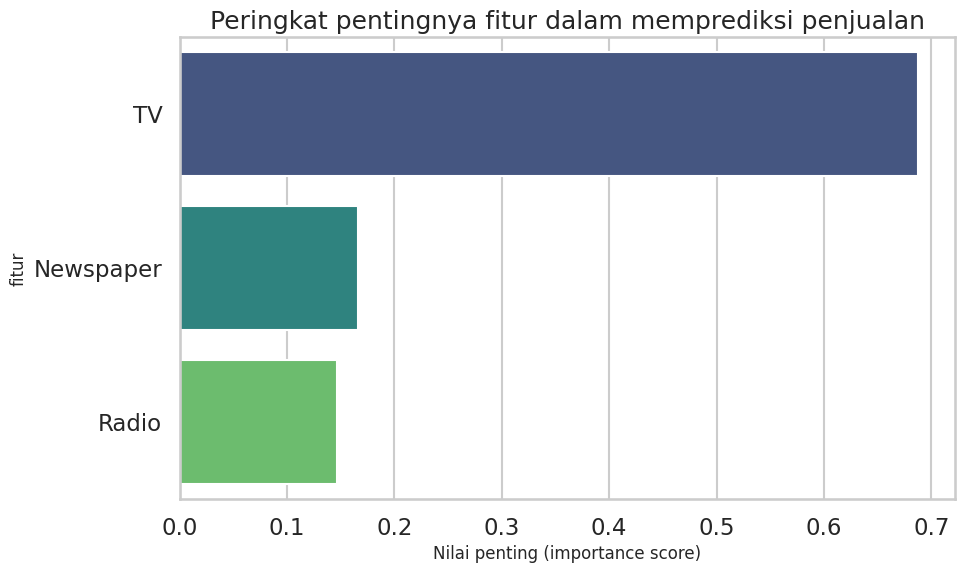

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', hue='Feature')
plt.title('Peringkat pentingnya fitur dalam memprediksi penjualan', fontsize=18)
plt.xlabel('Nilai penting (importance score)', fontsize=12)
plt.ylabel('fitur', fontsize=12)
plt.show()

**Analisis:**

Visualisasi ini sangat jelas. **Anggaran iklan TV** adalah faktor yang **jauh paling penting** dalam memprediksi penjualan, diikuti oleh Koran. Anggaran untuk radio memiliki pengaruh yang sangat kecil dibandingkan dua lainnya.

**Wawasan Bisnis:**
Berdasarkan ini, kita bisa memberikan rekomendasi yang dapat ditindaklanjuti: "Jika Anda memiliki anggaran iklan tambahan, alokasikan ke TV dan koran untuk mendapatkan dampak terbesar. Mengurangi anggaran Koran kemungkinan tidak akan banyak memengaruhi penjualan."



---
### 5. Perbandingan dengan Gradient Boosting

Apakah model yang berbeda akan setuju tentang fitur mana yang penting? Mari kita periksa dengan melatih model Gradient Boosting.



In [34]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train,y_train)

gb_importances = gb_model.feature_importances_

importance_df = pd.DataFrame(
    {
        'Feature': feature_names,
        'Importance':gb_importances
    }
)

# Mengurutkan DataFrame berdasarkan Importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Peringkat Pentingnya Fitur:")
print(importance_df)

Peringkat Pentingnya Fitur:
     Feature  Importance
0         TV    0.800397
2  Newspaper    0.151190
1      Radio    0.048413


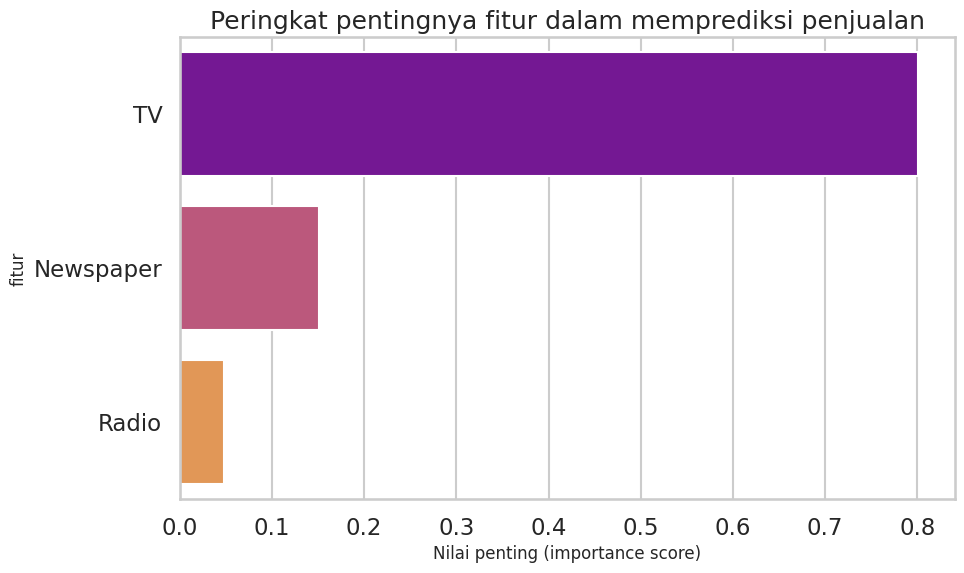

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='plasma',hue='Feature')
plt.title('Peringkat pentingnya fitur dalam memprediksi penjualan', fontsize=18)
plt.xlabel('Nilai penting (importance score)', fontsize=12)
plt.ylabel('fitur', fontsize=12)
plt.show()

**Analisis:**

Hasilnya sangat konsisten! Gradient Boosting juga setuju bahwa **TV** adalah fitur yang paling dominan, diikuti oleh **Newspaper**, dan **Radio** jauh di belakang. Ketika model yang berbeda memberikan kesimpulan yang sama, ini meningkatkan kepercayaan kita pada temuan tersebut.



### Kesimpulan

* **Feature Importance** adalah alat yang sangat berharga untuk **interpretasi model**. Ia membantu kita "membuka kotak hitam" dari model *ensemble*.
* Ia memberi kita peringkat kuantitatif tentang fitur mana yang paling berpengaruh dalam membuat prediksi.
* Wawasan ini tidak hanya berguna untuk memahami model, tetapi juga untuk **seleksi fitur** (kita bisa mempertimbangkan untuk menghapus fitur dengan *importance* sangat rendah) dan untuk memberikan **rekomendasi bisnis yang didukung oleh data**.

Dengan ini, Anda telah menyelesaikan perjalanan Anda melalui konsep-konsep inti dan algoritma regresi!
